In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
path = os.path.join(os.getcwd(), '../raw_data')

data_prep = pd.read_csv(os.path.join(path, 'x_train_preprocessed.csv'))
data_prep

,Unnamed: 0,summary,positives,negatives,advice_to_mgmt,review,summary_length,postives_length,negatives_length,advice_length,...,subjectivity_summary,polarity_summary,subjectivity_positives,polarity_positives,subjectivity_negatives,polarity_negatives,subjectivity_advice_to_mgmt,polarity_advice_to_mgmt,subjectivity_review,polarity_review
0,0,good job considering retail,apple good company period pay average working ...,job movement lateral extremely difficult get p...,NaN,good job considering retail apple good company...,31,118,127,0,...,0.600000,0.700000,0.666667,0.516667,1.000000,-0.500000,0.000000,0.000000,0.720000,0.350000
1,1,warning potential new hire,good pay smart coworkers good insurance,hr protect company employee careful restricted...,many employment contract state restricted stoc...,warning potential new hire good pay smart cowo...,31,41,132,1509,...,0.727273,0.068182,0.614286,0.538095,0.625000,0.075000,0.499852,0.120897,0.536005,0.157255
2,2,demanding job get work brilliant mind industry,intelligent co worker encouraged innovate good...,promote work life balance word employee get re...,employee get burned soon life outside work goi...,demanding job get work brilliant mind industry...,87,89,164,150,...,1.000000,0.900000,0.833333,0.783333,0.000000,0.000000,0.368750,-0.156250,0.706250,0.489583
3,3,deliver get fired,pay competitive look good resume move around i...,work life balance hostile environment reward b...,people disposable,deliver get fired pay competitive look good re...,21,189,306,26,...,0.000000,0.000000,0.460714,0.403571,0.492063,0.031746,0.000000,0.000000,0.474150,0.244218
4,4,good salary perk benefit,good salary perk benefit,hectic schedule u ill learning cutting technology,NaN,good salary perk benefit good salary perk bene...,34,34,57,0,...,0.600000,0.700000,0.600000,0.700000,0.950000,-0.550000,0.000000,0.000000,0.775000,0.075000
5,5,happy year working amazon,great people challenging project fast paced en...,hard get often turn away good people left clea...,great hiring need get better,happy year working amazon great people challen...,45,59,108,50,...,1.000000,0.800000,0.783333,0.500000,0.381250,0.127083,0.625000,0.650000,0.612500,0.410833
6,6,one hopefully soon remembered,great experience advancement understanding uti...,always enough time meet deadline,keep positive attitude try cooperate much poss...,one hopefully soon remembered great experience...,35,121,40,80,...,0.000000,0.000000,0.575000,0.450000,0.500000,0.000000,0.772727,0.113636,0.639091,0.225455
7,7,hardwork peanut,fellow team member great work,limited opportunity move within company,try treat team member like robot like human,hardwork peanut fellow team member great work ...,20,44,50,67,...,0.000000,0.000000,0.750000,0.800000,0.142857,-0.071429,0.100000,0.000000,0.330952,0.242857
8,8,software developer,really nothing share v,everything terrible v,NaN,software developer really nothing share v ever...,18,26,28,0,...,0.000000,0.000000,0.200000,0.200000,1.000000,-1.000000,0.000000,0.000000,0.600000,-0.400000
9,9,everyone high stress company growing pain,world class benefit smart coworkers food galor...,work life balance unrealistic recruiting expec...,stop micromanaging sourcers current recruiting...,everyone high stress company growing pain worl...,56,60,235,238,...,0.540000,0.160000,0.421429,0.257143,0.644444,-0.300000,0.594444,-0.133333,0.566614,-0.069524


In [3]:
data_prep.shape

(36970, 51)

In [4]:
data_prep.positives.isnull().sum()

1

In [5]:
# only consider positive reviews and drop nan values

positives = data_prep.positives.dropna()
positives.shape

(36969,)

In [6]:
positives

0        apple good company period pay average working ...
1                  good pay smart coworkers good insurance
2        intelligent co worker encouraged innovate good...
3        pay competitive look good resume move around i...
4                                 good salary perk benefit
5        great people challenging project fast paced en...
6        great experience advancement understanding uti...
7                            fellow team member great work
8                                   really nothing share v
9        world class benefit smart coworkers food galor...
10                    people technology impact scale money
11                            team work international echo
12                             dynamic fast moving company
13       good salary lot opportunity work different tec...
14       intelligent staff opportunity career developme...
15       easy straight forward job computer system easy...
16                                  great brand add resu

In [7]:
# only consider positive reviews and drop nan values

negatives = data_prep.negatives.dropna()
negatives.shape

(36961,)

In [8]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [9]:
vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(3,3)).fit(negatives) # words that appear most (top 20%) left out

data_vectorized = vectorizer.transform(negatives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('work life balance', 97.4095447281137), ('nothing bad say', 15.962335115839542), ('poor work life', 15.33085113241007), ('life balance hard', 14.167951118518506), ('hour short break', 13.388587024812336), ('long hour short', 13.123853196067865), ('great place work', 13.069896082766803), ('nothing come mind', 10.00128054859872), ('good place work', 9.75919149930474), ('none great place', 9.309115364409617)]
Topic 1:
[('work life balance', 117.40393322256112), ('long work hour', 15.50645263943624), ('work long hour', 14.56116063705433), ('long working hour', 13.596208628382398), ('life balance poor', 11.055175970098674), ('good work life', 10.468247925205429), ('life balance challenging', 10.095223876080267), ('con working amazon', 9.553804380799704), ('long hour foot', 9.499286409025698), ('life balance challenge', 9.128510918945246)]
Topic 2:
[('work life balance', 184.97645073295223), ('poor work life', 18.888784166824188), ('none none none', 17.328829179300683), ('life bal

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/theresasporn/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/theresasporn/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only     the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if   is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [12]:
data_nouns = pd.DataFrame(negatives.apply(nouns_adj))
data_nouns.shape

(36961, 1)

In [13]:
negatives.head()

0    job movement lateral extremely difficult get p...
1    hr protect company employee careful restricted...
2    promote work life balance word employee get re...
3    work life balance hostile environment reward b...
4    hectic schedule u ill learning cutting technology
Name: negatives, dtype: object

In [14]:
vectorizer = TfidfVectorizer(max_df=0.1).fit(data_nouns.negatives) # words that appear most (top 20%) left out

data_vectorized = vectorizer.transform(data_nouns.negatives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('con', 727.8632157216681), ('none', 378.57569706578386), ('good', 321.0488238848941), ('hard', 290.9335485144697), ('place', 283.2278256506801), ('big', 280.36456906344944), ('thing', 274.3792177557326), ('lot', 272.4209268283494), ('great', 264.71889938452824), ('many', 222.96758615624336)]
Topic 1:
[('day', 296.27384014541366), ('break', 218.9469006134589), ('manager', 215.36724936596417), ('job', 207.91853289349757), ('team', 198.69870261586814), ('lot', 163.09447672283375), ('hard', 145.62243318172455), ('employee', 144.01944671875236), ('short', 143.38581909052672), ('environment', 135.74165859961627)]
Topic 2:
[('balance', 823.7096867730969), ('employee', 432.34452680196165), ('high', 411.3950989996365), ('much', 409.50891889836805), ('pay', 409.12073647334586), ('growth', 392.3488147689735), ('manager', 380.640393430639), ('retail', 373.28355564382895), ('nothing', 359.1148899409829), ('career', 335.39338822537195)]


In [ ]:
tokenized = []
for sentence in negatives:
    tokenized.append(word_tokenize(sentence))
    
tokenized(10)

In [17]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [18]:
# create id2word
id2word = corpora.Dictionary(tokenized)

# Create Corpus
texts = tokenized

# Creat Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [19]:
ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, iterations=100)

In [20]:
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.47477551424010067


In [21]:
import pprint as pp
#pp = #+(indent=4)

In [22]:
pp.pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('work', 0.040019386),
   ('time', 0.018415123),
   ('hour', 0.017391397),
   ('life', 0.014341029),
   ('balance', 0.011995772),
   ('company', 0.010247593),
   ('long', 0.009260842),
   ('pay', 0.008236675),
   ('working', 0.0079765115),
   ('lot', 0.0073921434)]),
 (1,
  [('management', 0.014929661),
   ('people', 0.013992077),
   ('get', 0.012614286),
   ('manager', 0.0124864),
   ('company', 0.01160472),
   ('employee', 0.010525051),
   ('work', 0.009852179),
   ('team', 0.00870214),
   ('hard', 0.006778337),
   ('make', 0.005838236)])]


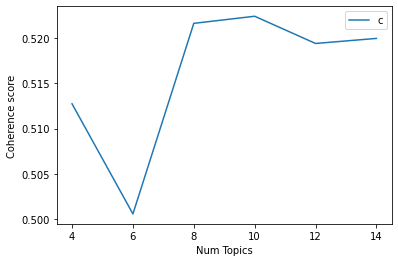

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, alpha=.91)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


# Running the above function. Can take a long time to run!
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=16, step=2)


# Show graph of LDA coherence scores
# ATTEN: parameters here have to match those of you function to display properly!
limit = 16
start = 4
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [31]:
max_y = max(coherence_values)  # Find the maximum y value
max_x = coherence_values.index(max(coherence_values))  # Find the x value corresponding to the maximum y value
#xmax = x[numpy.argmax(y)]

optimal_model = model_list[coherence_values.index(max(coherence_values))]
#optimal_model = coherence_values.index(max(coherence_values))
#optimal_model
#model_topics = optimal_model.show_topics(formatted=False)
#pp.pprint(optimal_model.print_topics(num_words=10))

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
optimal_model

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
optimal_num_topics = coherence_values.index(max(coherence_values))
optimal_num_topics

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

In [26]:
import pyLDAvis
import pyLDAvis.gensim

In [39]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.010334 -0.178403       1        1  16.762810
2     -0.115780 -0.118092       2        1  13.920285
0      0.142361 -0.015034       3        1  11.625247
3      0.165875  0.026006       4        1   9.043889
7      0.099109 -0.010394       5        1   8.963264
1     -0.160012  0.013179       6        1   8.835593
8      0.021266 -0.021337       7        1   8.598861
6     -0.078487  0.051450       8        1   7.752428
9     -0.049756  0.181933       9        1   7.737319
4     -0.014242  0.070692      10        1   6.760309, topic_info=     Category          Freq          Term         Total  loglift  logprob
33    Default  14125.000000          work  14125.000000  30.0000  30.0000
297   Default   4806.000000          team   4806.000000  29.0000  29.0000
21    Default   3176.000000       balance   3176.000000  28.0000  28.0000
24    Default   3929.000000          life   3929.000000  27.0000  27.0000
88    Default   6251.000000    management   6251.000000  26.0000  26.0000
141   Default   2595.000000      customer   2595.000000  25.0000  25.0000
23    Default   4965.000000          hour   4965.000000  24.0000  24.0000
116   Default   2929.000000          long   2929.000000  23.0000  23.0000
185   Default   1409.000000       nothing   1409.000000  22.0000  22.0000
105   Default   1899.000000           con   1899.000000  21.0000  21.0000
120   Default   2480.000000     sometimes   2480.000000  20.0000  20.0000
12    Default   7180.000000       company   7180.000000  19.0000  19.0000
29    Default   6927.000000          time   6927.000000  18.0000  18.0000
510   Default   1880.000000         shift   1880.000000  17.0000  17.0000
171   Default   1639.000000        retail   1639.000000  16.0000  16.0000
477   Default   1086.000000         break   1086.000000  15.0000  15.0000
139   Default   1624.000000         apple   1624.000000  14.0000  14.0000
1157  Default   1215.000000        salary   1215.000000  13.0000  13.0000
833   Default   1779.000000      politics   1779.000000  12.0000  12.0000
87    Default   1486.000000          lack   1486.000000  11.0000  11.0000
137   Default   2356.000000           pay   2356.000000  10.0000  10.0000
5     Default   3935.000000           job   3935.000000   9.0000   9.0000
83    Default   1882.000000        career   1882.000000   8.0000   8.0000
2     Default   1526.000000     difficult   1526.000000   7.0000   7.0000
326   Default   2941.000000           day   2941.000000   6.0000   6.0000
539   Default   1575.000000         place   1575.000000   5.0000   5.0000
153   Default   1084.000000             ’   1084.000000   4.0000   4.0000
612   Default   1050.000000          best   1050.000000   3.0000   3.0000
319   Default    898.000000          fast    898.000000   2.0000   2.0000
311   Default   1968.000000         level   1968.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
132   Topic10    611.539246         great   1864.309326   1.5794  -4.2190
1996  Topic10     61.748928         match     89.800011   2.3196  -6.5119
506   Topic10    106.110107          nice    200.659241   2.0570  -5.9705
310   Topic10    229.142975  compensation    630.158447   1.6825  -5.2006
33    Topic10   1801.446411          work  14125.250000   0.6347  -3.1386
57    Topic10    140.476913      learning    309.677612   1.9036  -5.6899
515   Topic10    307.197357       benefit   1041.811279   1.4729  -4.9075
1077  Topic10     82.898209         enjoy    143.109055   2.1481  -6.2173
699   Topic10    118.435532          base    261.115112   1.9035  -5.8606
343   Topic10    361.667664        little   1763.638428   1.1097  -4.7442
355   Topic10    424.924072          need   2457.174561   0.9392  -4.5831
12    Topic10    734.899353       company   7180.134277   0.4148  -4.0352
23    Topic10    573.987671          hour   4965.3291

In [42]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
Import NewsGroups Dataset


/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'spacy'

In [ ]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

## Trying with functions

In [43]:
def make_pyLDAvis(dictionary, corpus, texts, limit, start=2, step=1):
    id2word = corpora.Dictionary(tokenized)
    texts = tokenized
    corpus = [id2word.doc2bow(text) for text in texts]
    ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, iterations=100)
    coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_ldamallet = coherence_model_ldamallet.get_coherence()
    #model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=16, step=2)
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, alpha=.91)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

    max_y = max(coherence_values) 
    max_x = coherence_values.index(max(coherence_values))  
    optimal_model = model_list[coherence_values.index(max(coherence_values))]
    
    #optimal_num_topics = coherence_values.index(max(coherence_values))
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
    return vis

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
vis

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.010334 -0.178403       1        1  16.762810
2     -0.115780 -0.118092       2        1  13.920285
0      0.142361 -0.015034       3        1  11.625247
3      0.165875  0.026006       4        1   9.043889
7      0.099109 -0.010394       5        1   8.963264
1     -0.160012  0.013179       6        1   8.835593
8      0.021266 -0.021337       7        1   8.598861
6     -0.078487  0.051450       8        1   7.752428
9     -0.049756  0.181933       9        1   7.737319
4     -0.014242  0.070692      10        1   6.760309, topic_info=     Category          Freq          Term         Total  loglift  logprob
33    Default  14125.000000          work  14125.000000  30.0000  30.0000
297   Default   4806.000000          team   4806.000000  29.0000  29.0000
21    Default   3176.000000       balance   3176.000000  28.0000  28.0000
24    Default   3929.000000          life   3929.000000  27.0000  27.0000
88    Default   6251.000000    management   6251.000000  26.0000  26.0000
141   Default   2595.000000      customer   2595.000000  25.0000  25.0000
23    Default   4965.000000          hour   4965.000000  24.0000  24.0000
116   Default   2929.000000          long   2929.000000  23.0000  23.0000
185   Default   1409.000000       nothing   1409.000000  22.0000  22.0000
105   Default   1899.000000           con   1899.000000  21.0000  21.0000
120   Default   2480.000000     sometimes   2480.000000  20.0000  20.0000
12    Default   7180.000000       company   7180.000000  19.0000  19.0000
29    Default   6927.000000          time   6927.000000  18.0000  18.0000
510   Default   1880.000000         shift   1880.000000  17.0000  17.0000
171   Default   1639.000000        retail   1639.000000  16.0000  16.0000
477   Default   1086.000000         break   1086.000000  15.0000  15.0000
139   Default   1624.000000         apple   1624.000000  14.0000  14.0000
1157  Default   1215.000000        salary   1215.000000  13.0000  13.0000
833   Default   1779.000000      politics   1779.000000  12.0000  12.0000
87    Default   1486.000000          lack   1486.000000  11.0000  11.0000
137   Default   2356.000000           pay   2356.000000  10.0000  10.0000
5     Default   3935.000000           job   3935.000000   9.0000   9.0000
83    Default   1882.000000        career   1882.000000   8.0000   8.0000
2     Default   1526.000000     difficult   1526.000000   7.0000   7.0000
326   Default   2941.000000           day   2941.000000   6.0000   6.0000
539   Default   1575.000000         place   1575.000000   5.0000   5.0000
153   Default   1084.000000             ’   1084.000000   4.0000   4.0000
612   Default   1050.000000          best   1050.000000   3.0000   3.0000
319   Default    898.000000          fast    898.000000   2.0000   2.0000
311   Default   1968.000000         level   1968.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
132   Topic10    611.539246         great   1864.309326   1.5794  -4.2190
1996  Topic10     61.748928         match     89.800011   2.3196  -6.5119
506   Topic10    106.110107          nice    200.659241   2.0570  -5.9705
310   Topic10    229.142975  compensation    630.158447   1.6825  -5.2006
33    Topic10   1801.446411          work  14125.250000   0.6347  -3.1386
57    Topic10    140.476913      learning    309.677612   1.9036  -5.6899
515   Topic10    307.197357       benefit   1041.811279   1.4729  -4.9075
1077  Topic10     82.898209         enjoy    143.109055   2.1481  -6.2173
699   Topic10    118.435532          base    261.115112   1.9035  -5.8606
343   Topic10    361.667664        little   1763.638428   1.1097  -4.7442
355   Topic10    424.924072          need   2457.174561   0.9392  -4.5831
12    Topic10    734.899353       company   7180.134277   0.4148  -4.0352
23    Topic10    573.987671          hour   4965.3291

In [4]:
from WorkforceSentimentMonitoring.preprocessing import preprocessing
from WorkforceSentimentMonitoring.data import get_data, merge
import pandas as pd
from sklearn.model_selection import train_test_split
import os

ModuleNotFoundError: No module named 'WorkforceSentimentMonitoring'

In [28]:
submission, train, test = get_data()

In [29]:
text = merge(submission, train, test)
positives = text['positives']
positives

0                            People are smart and friendly
1        1) Food, food, food. 15+ cafes on main campus ...
2        * If you're a software engineer, you're among ...
3        You can't find a more well-regarded company th...
4                   Impact driven. Best tech in the world.
6           The people are great to work with, good perks.
8                 Really fun work environment with startup
10        I like and learned from the beginning accounting
11                  Very inspiring engineers to work with.
12       The people are awesome. Lots of perks. Reduce ...
13       So many brilliant people Tons of resources Wor...
14         Google is one of the beast Company in the world
15       Better than average engineers. Competitive com...
16       The best company I've worked for. Culture, per...
18       Amazing compensation + benefits (hard to beat ...
19       Ambitious mission, great colleagues, supportiv...
20       Good opportunities for different technical exp.

In [1]:
import nltk

In [2]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

def lemmatize(text):
    """Lemmatize text"""
    lemmatizer = WordNetLemmatizer() # Initiate lemmatizer
    lemmatized = [lemmatizer.lemmatize(word) for word in text] # Lemmatize
    lemmatized_string = " ".join(lemmatized)
    text = lemmatized_string
    return text

In [3]:
lemmatize(positives)

NameError: name 'positives' is not defined

In [5]:
positives_prep = preprocessing(positives)

OSError: No such file or directory: '/Users/theresasporn/nltk_data/corpora/wordnet/index.noun'

In [47]:
positives.tolist()

AttributeError: 'list' object has no attribute 'tolist'